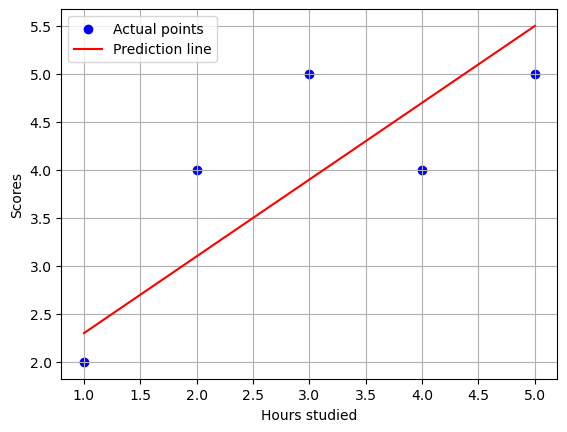

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
x = np.array([1, 2, 3, 4, 5])        # Hours studied
y = np.array([2, 4, 5, 4, 5])        # Scores

# Assume slope (m) = 0.8 and intercept (b) = 1.5
m, b = 0.8, 1.5
y_pred = m * x + b

# Plot
plt.scatter(x, y, color='blue', label='Actual points')
plt.plot(x, y_pred, color='red', label='Prediction line')
plt.xlabel("Hours studied")
plt.ylabel("Scores")
plt.grid()
plt.legend()
plt.show()


In [2]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Example
y_pred = m * x + b
mse = mean_squared_error(y, y_pred)
print("MSE:", mse)


MSE: 0.5699999999999998


In [3]:
import numpy as np

# Data
x = np.array([1, 2, 3, 4, 5])        # hours studied
y = np.array([2, 4, 5, 4, 5])        # actual scores

# Initialize parameters
m = 0
b = 0
learning_rate = 0.01
epochs = 1000  # number of times we'll adjust

n = len(x)

# Gradient Descent Loop
for _ in range(epochs):
    y_pred = m * x + b
    # calculate gradients
    dm = (-2/n) * np.sum(x * (y - y_pred))
    db = (-2/n) * np.sum(y - y_pred)
    # update parameters
    m -= learning_rate * dm
    b -= learning_rate * db

print(f"m (slope): {m:.2f}")
print(f"b (intercept): {b:.2f}")

# Predictions after training
predicted = m * x + b
print("Predicted scores:", predicted)


m (slope): 0.62
b (intercept): 2.14
Predicted scores: [2.75381144 3.37150606 3.98920067 4.60689529 5.2245899 ]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Sample data
data = {
    'Experience': [1, 2, 3, 4, 5],
    'Age': [22, 25, 28, 35, 40],
    'Salary': [25000, 30000, 40000, 50000, 60000]
}

df = pd.DataFrame(data)

X = df[['Experience', 'Age']]  # Independent variables
y = df['Salary']               # Dependent variable

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Predictions
predictions = model.predict(X)
print("Predicted salaries:", predictions)



Predicted salaries: [24125. 31625. 39125. 50375. 59750.]


Explanation:
Here, the model learns how both Experience and Age together influence Salary.
Each input feature gets its own weight (coefficient).

You can check them using:

In [9]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [4687.5  937.5]
Intercept: -1187.5


In [8]:
# Calculate Score of prediction
score = model.score(X, y)
print("Model R^2 Score:", score)

Model R^2 Score: 0.9946646341463414


### Feature Scaling & Normalization

When your features have different ranges (like “Age” in years and “Salary” in dollars), the model can get confused.
To fix that, we scale or normalize them so they’re on a similar range.

Example using StandardScaler:

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X_scaled, y)
predictions_scaled = model.predict(X_scaled)
print("Predicted salaries with scaled features:", predictions_scaled)


Predicted salaries with scaled features: [24125. 31625. 39125. 50375. 59750.]


### Handling Categorical Variables (Brief)

Sometimes, data contains text values like “Male” or “Female”, or “City A”, “City B”.
We can’t feed text directly into a model, so we use encoding.

Example using OneHotEncoder:

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cities = np.array([['Lagos'], ['Abuja'], ['Uyo']])
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(cities)

print(encoded)

# This converts text into numeric form that the model can understand.


[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
